169001437/169001437 [==============================] - 3s 0us/step
Epoch 1/50
196/196 [==============================] - 8s 34ms/step - loss: 0.6433 - val_loss: 0.6194
Epoch 2/50
196/196 [==============================] - 7s 36ms/step - loss: 0.6137 - val_loss: 0.6092
Epoch 3/50
196/196 [==============================] - 6s 31ms/step - loss: 0.6055 - val_loss: 0.6027
Epoch 4/50
196/196 [==============================] - 7s 36ms/step - loss: 0.6004 - val_loss: 0.5979
Epoch 5/50
196/196 [==============================] - 7s 37ms/step - loss: 0.5963 - val_loss: 0.5940
Epoch 6/50
196/196 [==============================] - 7s 36ms/step - loss: 0.5922 - val_loss: 0.5907
Epoch 7/50
196/196 [==============================] - 7s 36ms/step - loss: 0.5894 - val_loss: 0.5877
Epoch 8/50
196/196 [==============================] - 6s 31ms/step - loss: 0.5868 - val_loss: 0.5861
Epoch 9/50
196/196 [==============================] - 7s 36ms/step - loss: 0.5854 - val_loss: 0.5849
Epoch 10/50
196/196 [===

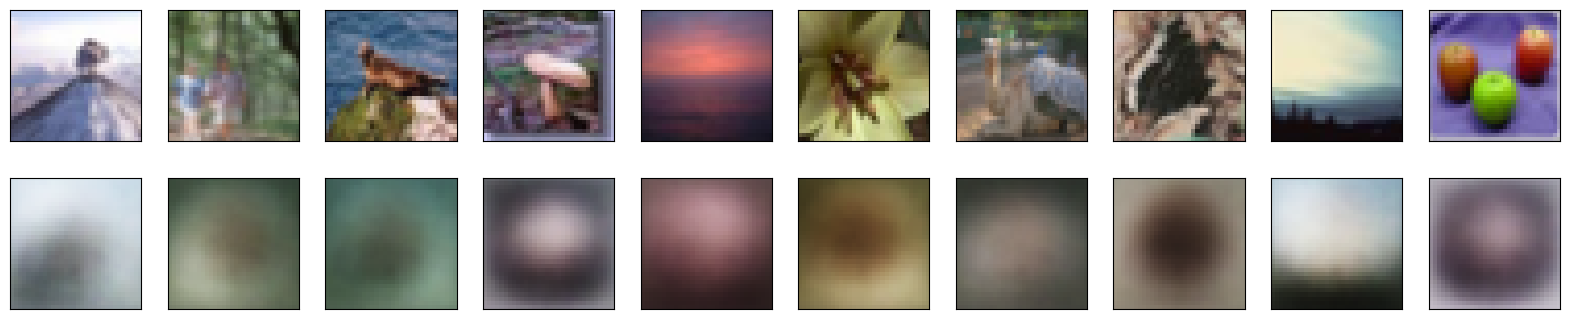

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar100  # Import CIFAR-100 dataset

# Load the CIFAR-100 dataset
(x_train, _), (x_test, _) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for the autoencoder
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 32  # Size of the encoded representations
input_img = Input(shape=(x_train_flat.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(x_train_flat.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_flat, x_train_flat, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_flat, x_test_flat))

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the test images
encoded_imgs = encoder.predict(x_test_flat)

# Decode the encoded images
decoded_imgs = autoencoder.predict(x_test_flat)

# Display original and reconstructed images
n = 10  # Number of samples to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])  # Assuming your dataset is in image format
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(x_test.shape[1:]))  # Assuming your dataset is in image format
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
